In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Advertising.csv")

In [ ]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
duplicates = df.duplicated(keep = False).sum()
duplicates

0

In [ ]:
zeros_count = (df == 0).sum()
zeros_count

,0
Unnamed: 0,0
TV,0
Radio,1
Newspaper,0
Sales,0


In [ ]:
df.drop("Unnamed: 0",inplace = True,axis = 1)

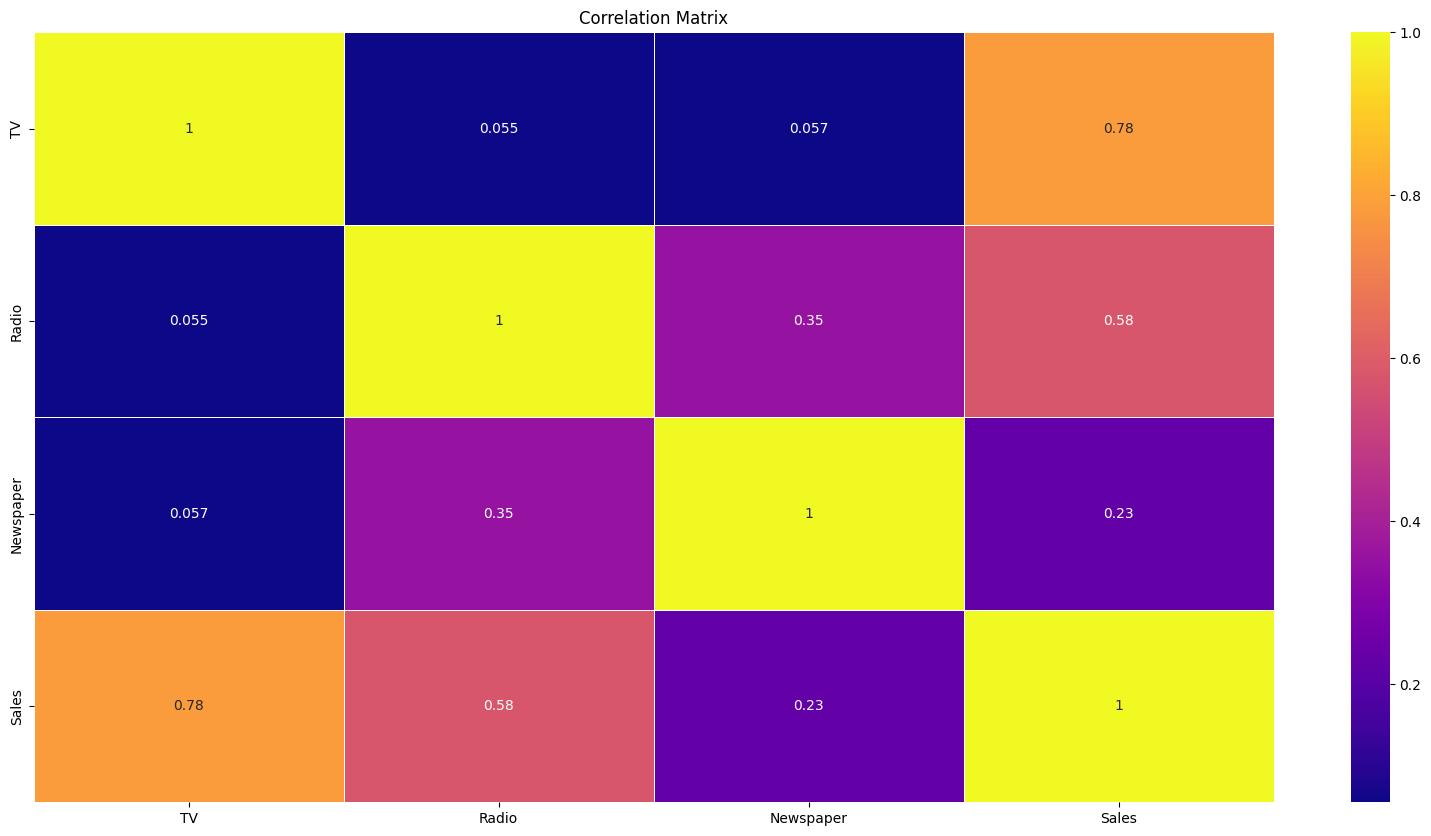

In [ ]:
df.corr(numeric_only=True)
plt.figure(figsize = (20,10))
cmap = sns.color_palette("plasma", as_cmap=True)
sns.heatmap(df.corr(numeric_only = True),annot = True,linewidth = 0.5,cmap=cmap)
plt.title("Correlation Matrix")
plt.show()

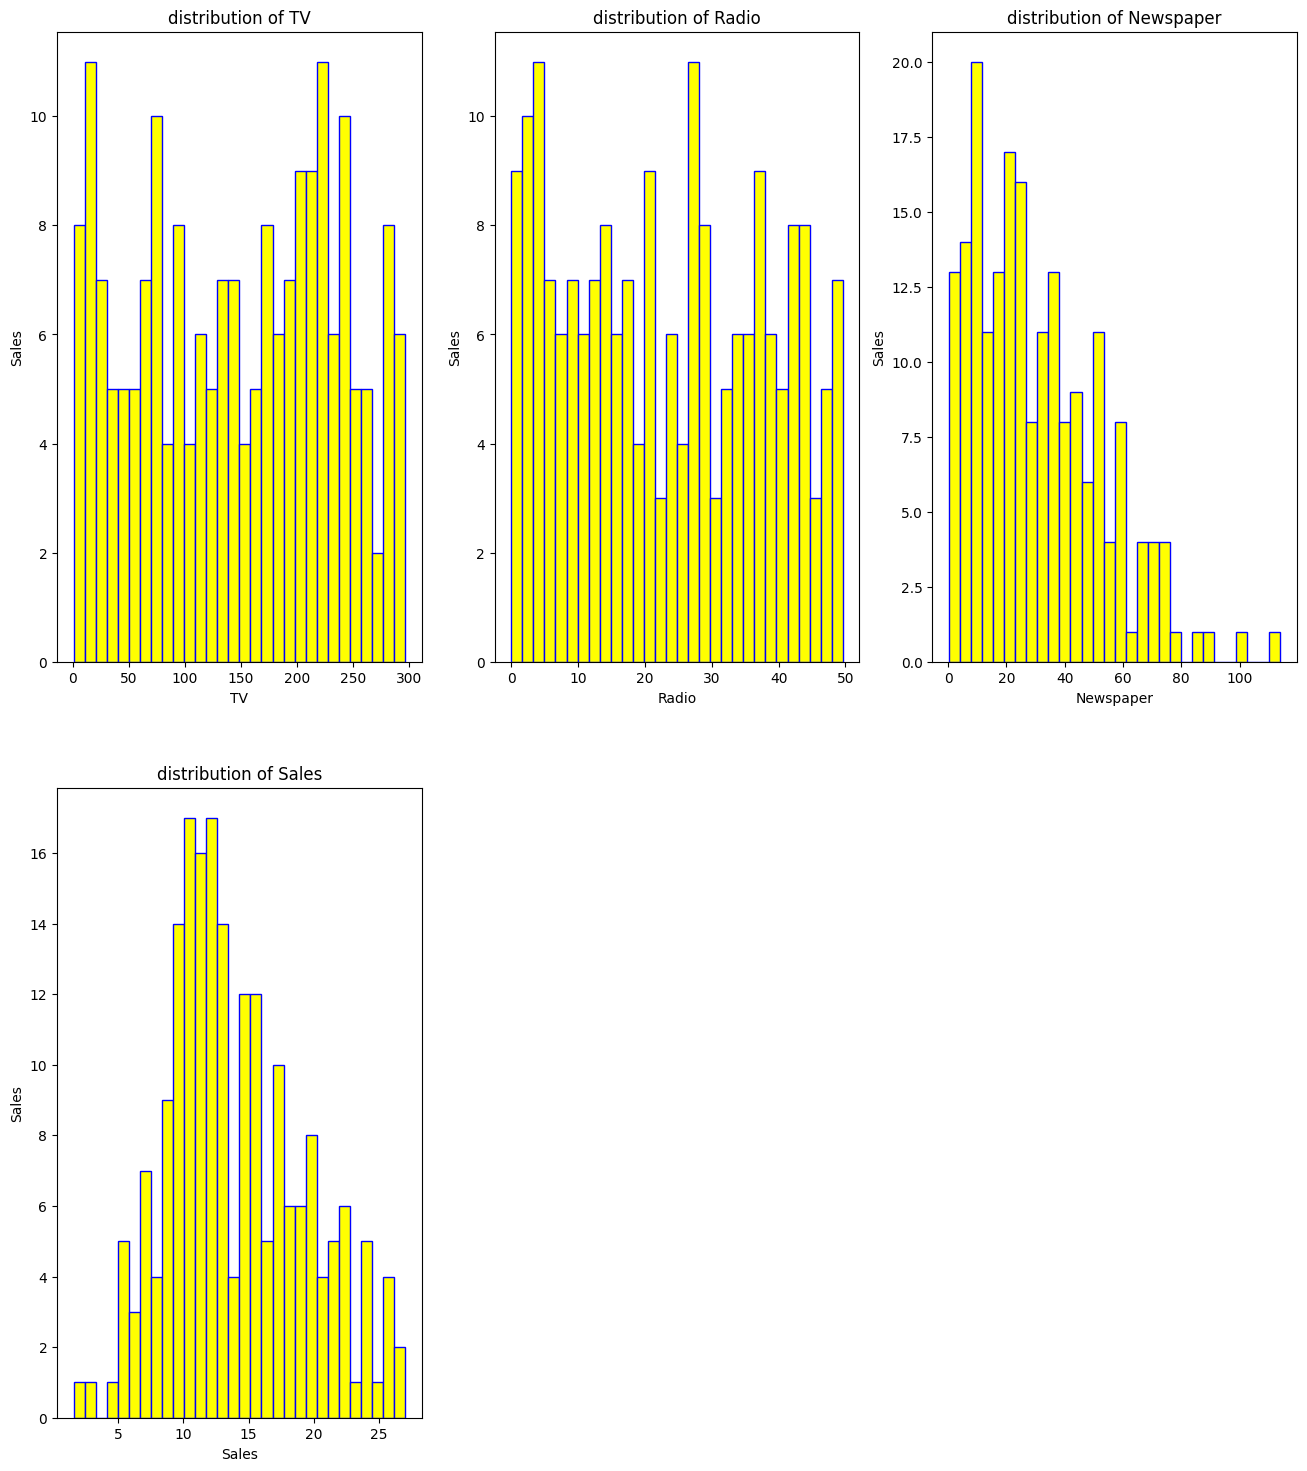

In [ ]:
numerical_columns = df.select_dtypes(include = ['float64','int64']).columns
plt.figure(figsize=(16,18))
for i,col in enumerate(numerical_columns,1):
  plt.subplot(len(numerical_columns)//3+1,3,i)
  plt.hist(df[col],bins=30,color='yellow',edgecolor='blue')
  plt.title(f'distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Sales')


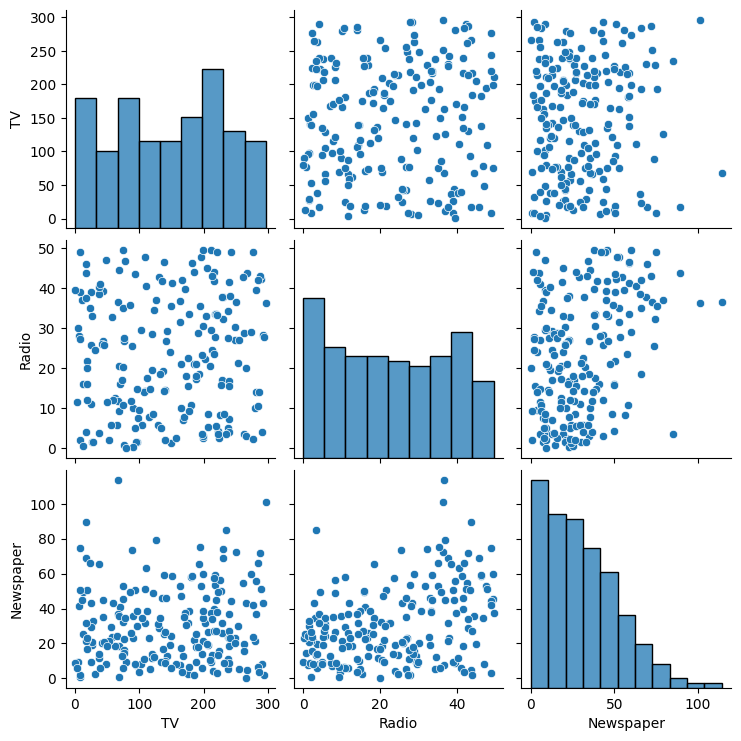

In [ ]:
features = df.drop(columns = ["Sales"])
sns.pairplot(features)


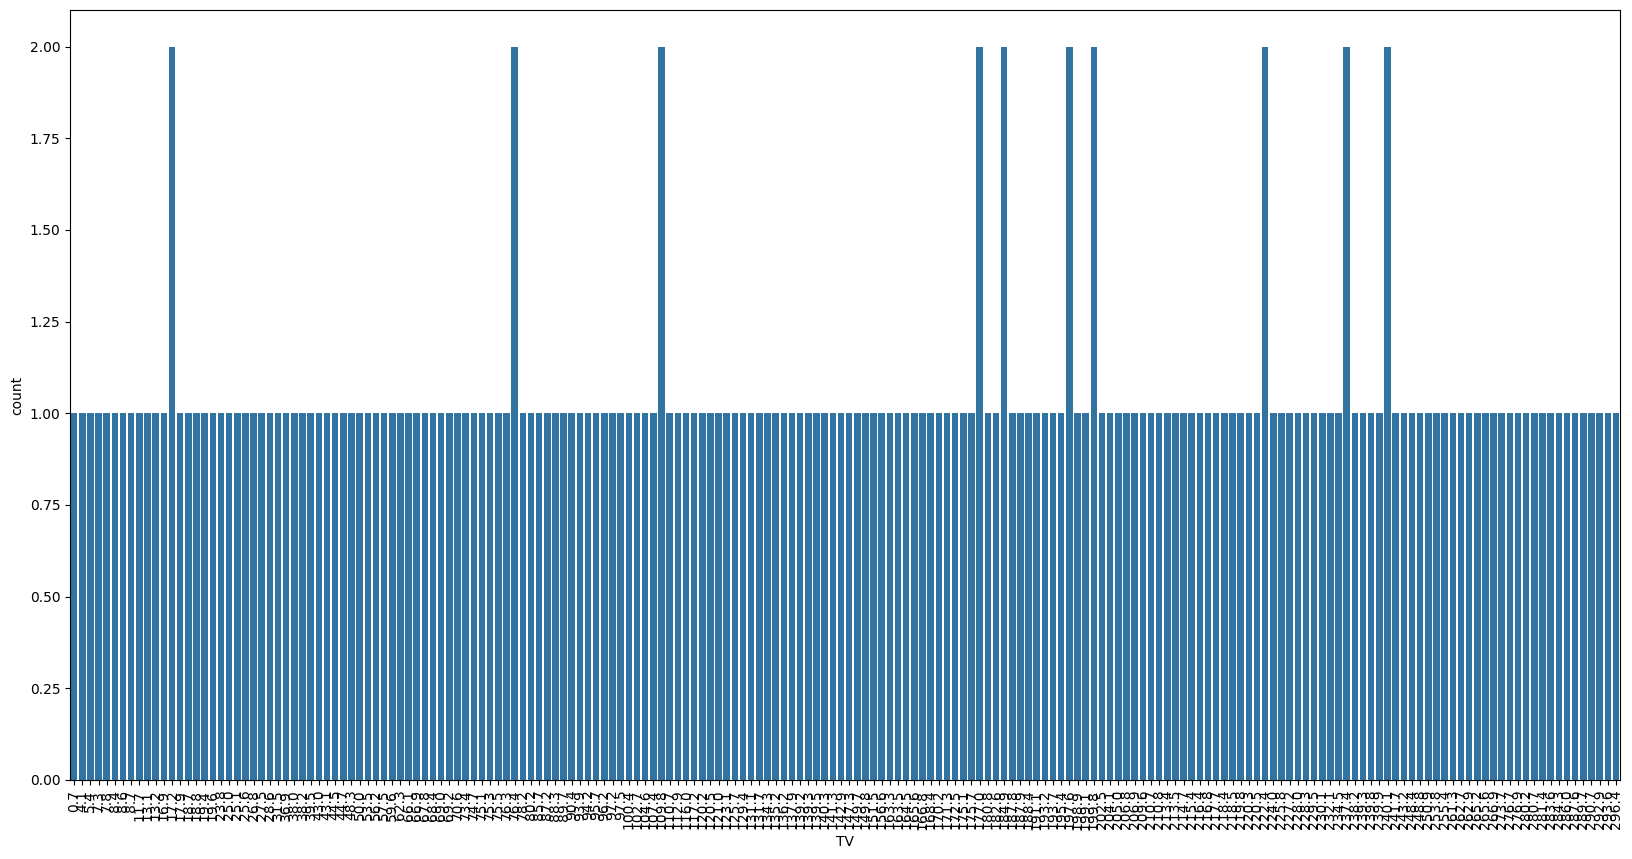

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['TV'],data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df["TV"].value_counts()

,count
TV,
199.8,2
109.8,2
17.2,2
177.0,2
222.4,2
...,...
139.3,1
216.8,1
199.1,1


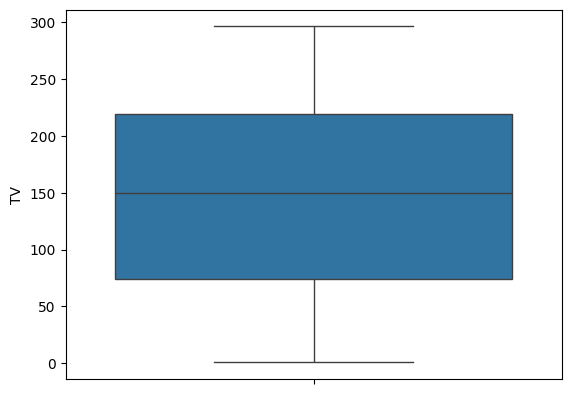

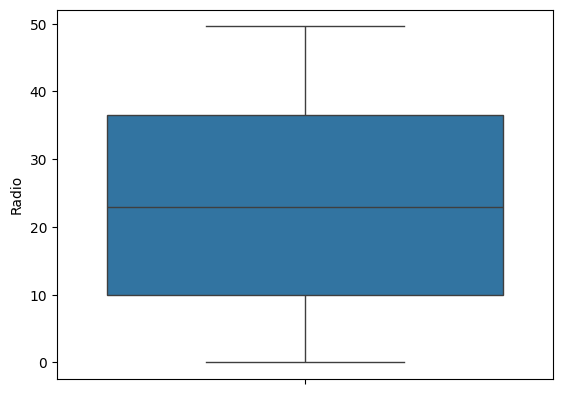

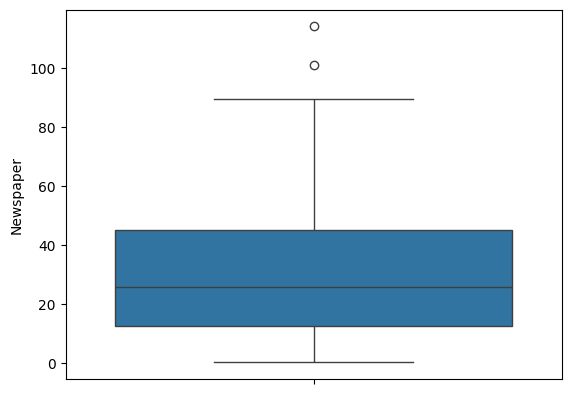

In [ ]:
lst=[]
lst.extend(df.columns)
lst.remove('Sales')
for i in lst:
  sns.boxplot(y=i,data=df)
  plt.show()

In [ ]:
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [ ]:
outlier_counts ={}
for col in df:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  outliers = (df[col]<lower_bound) | (df[col]>upper_bound)

  print(f"sum of outliers(IQR method) for {col}:",outliers.sum())


sum of outliers(IQR method) for TV: 0
sum of outliers(IQR method) for Radio: 0
sum of outliers(IQR method) for Newspaper: 2
sum of outliers(IQR method) for Sales: 0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 #X = df.drop(columns = "Sales")
 #y = df["Sales"]


In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
X = df.drop(columns = "Sales")
y = df["Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Decision Tree Regressor
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train,y_train)
dtr_predictions = dtr_model.predict(X_test)

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train,y_train)
gbr_predictions = gbr_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
rf_predictions = rf_model.predict(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_predictions = lr_model.predict(X_test)



In [ ]:
# Evaluation Metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Evaluating Decision Tree Regressor
dtr_mse, dtr_mae, dtr_r2 = evaluate(y_test, dtr_predictions)
print("Decision Tree Regressor Mean Squared Error:", dtr_mse)
print("Decision Tree Regressor Mean Absolute Error:", dtr_mae)
print("Decision Tree Regressor R^2 Score:", dtr_r2)

# Evaluating Gradient Boosting Regressor
gbr_mse, gbr_mae, gbr_r2 = evaluate(y_test, gbr_predictions)
print("Gradient Boosting Regressor Mean Squared Error:", gbr_mse)
print("Gradient Boosting Regressor Mean Absolute Error:", gbr_mae)
print("Gradient Boosting Regressor R^2 Score:", gbr_r2)

# Evaluating Random Forest Regressor
rf_mse, rf_mae, rf_r2 = evaluate(y_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest Mean Absolute Error:", rf_mae)
print("Random Forest R^2 Score:", rf_r2)

# Evaluating Linear Regression
lr_mse, lr_mae, lr_r2 = evaluate(y_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)
print("Linear Regression R^2 Score:", lr_r2)


Decision Tree Regressor Mean Squared Error: 1.6082499999999995
Decision Tree Regressor Mean Absolute Error: 0.9374999999999998
Decision Tree Regressor R^2 Score: 0.9490473102417243
Gradient Boosting Regressor Mean Squared Error: 0.5184875806011512
Gradient Boosting Regressor Mean Absolute Error: 0.6138417417448436
Gradient Boosting Regressor R^2 Score: 0.9835732399577868
Random Forest Mean Squared Error: 0.5576028250000007
Random Forest Mean Absolute Error: 0.6025749999999995
Random Forest R^2 Score: 0.9823339880301177
Linear Regression Mean Squared Error: 3.1740973539761033
Linear Regression Mean Absolute Error: 1.4607567168117603
Linear Regression R^2 Score: 0.899438024100912
